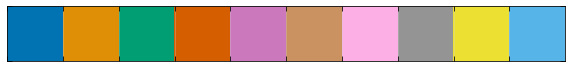

In [1]:
import numpy as np
import pandas as pd
import notebook
import sys
from icecube import astro
sys.path.append('/home/apizzuto/Nova/scripts/')
from Novae import Nova
from helper_functions import *
from sensitivity_fit_functions import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from skylab.datasets import Datasets

%matplotlib inline


plt.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
palette = sns.color_palette('colorblind')
sns.palplot(palette)

In [2]:
slopes = np.linspace(1., 4., 11)
cutoffs = np.logspace(0., 7., 15)
sinDecs = np.linspace(-0.8, 0.8, 5)

#greco_mc = np.load('/data/user/mlarson/combo_r129072/skylab/scripts/testing/GRECO/version-001-p00/IC86_2012_mc.npy')
greco_mc = np.load('/home/mlarson/GRECO/version-001-p00/IC86_2012_mc.npy')
gfu_exp, gfu_mc, gfu_livetime = Datasets['GFU_v002p05'].season("IC86, 2012")
#del(gfu_exp), del(gfu_livetime)

In [7]:
test_ens = np.logspace(-1., 8., 101)
gfu_novae, greco_novae = [], []
sd = sinDecs[0]

for slope in slopes[:]:
    print slope
    gfu_novae.append([])
    greco_novae.append([])
    for cutoff in cutoffs[:]:
        gfunova = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
                    flux_norm = 1., cutoff = cutoff, dataset = gfu_mc)
        gfu_novae[-1].append(gfunova.calc_expected_signal_binned(test_ens)[1])
        greconova = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
                    flux_norm = 1., cutoff = cutoff, dataset = greco_mc)
        greco_novae[-1].append(greconova.calc_expected_signal_binned(test_ens)[1])

1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0


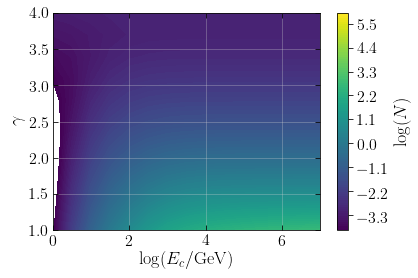

In [14]:
greco_novae = np.asarray(greco_novae)
gfu_novae = np.asarray(gfu_novae)

X, Y = np.meshgrid(np.log10(cutoffs), slopes)

plt.contourf(X, Y, np.log10(greco_novae), levels = np.linspace(-4., 6., 101), origin='lower', cmap = 'viridis')
cbar = plt.colorbar()
cbar.ax.tick_params(direction='out')
cbar.set_label('$\log (N)$')
plt.xlabel(r'$\log (E_c / \rm{GeV})$')
plt.ylabel(r'$\gamma$')
plt.show()

/home/apizzuto/.venvs/nova/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


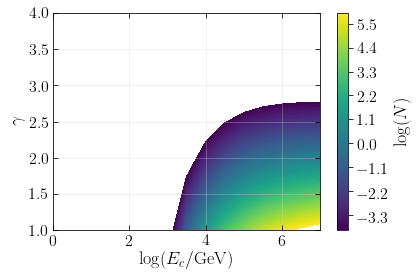

In [15]:
X, Y = np.meshgrid(np.log10(cutoffs), slopes)

plt.contourf(X, Y, np.log10(gfu_novae), levels = np.linspace(-4., 6., 101), origin='lower', cmap='viridis')
cbar = plt.colorbar()
cbar.ax.tick_params(direction='out')
cbar.set_label('$\log (N)$')
plt.xlabel(r'$\log (E_c / \rm{GeV})$')
plt.ylabel(r'$\gamma$')
plt.show()

(1e-07, 100000.0)

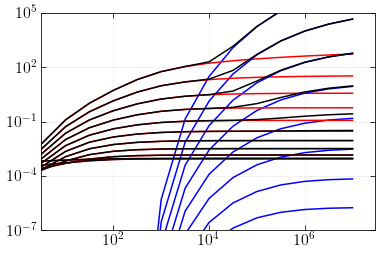

In [17]:
for i in range(len(gfu_novae)):
    plt.plot(cutoffs, gfu_novae[i], c = 'b')
    plt.plot(cutoffs, greco_novae[i], c = 'r')
    plt.plot(cutoffs, greco_novae[i] + gfu_novae[i], c = 'k')
    
plt.loglog()
plt.xlim(3e0,3e7)
plt.ylim(1e-7, 1e5)

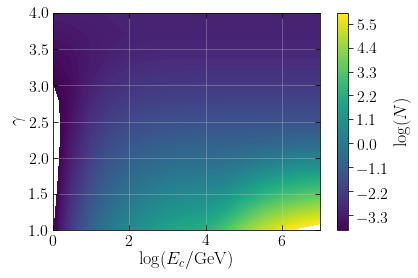

In [18]:
plt.contourf(X, Y, np.log10(gfu_novae + greco_novae), levels = np.linspace(-4., 6., 101), 
             origin='lower', cmap='viridis')
cbar = plt.colorbar()
cbar.ax.tick_params(direction='out')
cbar.set_label('$\log (N)$')
plt.xlabel(r'$\log (E_c / \rm{GeV})$')
plt.ylabel(r'$\gamma$')
plt.show()

In [19]:
gfu_novae = []
greco_novae = []

for sd in sinDecs:
    gfu_novae.append([])
    greco_novae.append([])
    for slope in slopes[:]:
        print slope
        gfu_novae[-1].append([])
        greco_novae[-1].append([])
        for cutoff in cutoffs[:]:
            gfunova = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
                        flux_norm = 1., cutoff = cutoff, dataset = gfu_mc)
            gfu_novae[-1][-1].append(gfunova.calc_expected_signal_binned(test_ens)[1])
            greconova = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
                        flux_norm = 1., cutoff = cutoff, dataset = greco_mc)
            greco_novae[-1][-1].append(greconova.calc_expected_signal_binned(test_ens)[1])

1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0
1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0
1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0
1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0
1.0
1.3
1.6
1.9
2.2
2.5
2.8
3.1
3.4
3.6999999999999997
4.0


In [60]:
for col in sns.xkcd_rgb.keys():
    if 'gray' in col:
        print col
    elif 'grey' in col:
        print col

light grey blue
greyish green
green grey
grey blue
charcoal grey
grey pink
grey
blue/grey
grey brown
light grey green
light blue grey
grey purple
grey teal
greyish blue
grey green
medium grey
grey/green
dark blue grey
dark grey blue
light grey
greeny grey
blue grey
greyish brown
greyblue
greenish grey
bluey grey
cool grey
warm grey
purpley grey
battleship grey
greyish pink
reddish grey
brown grey
slate grey
pinkish grey
brownish grey
dark grey
greyish
grey/blue
purple grey
bluish grey
pale grey
steel grey
bluegrey
greyish purple
purplish grey
greyish teal


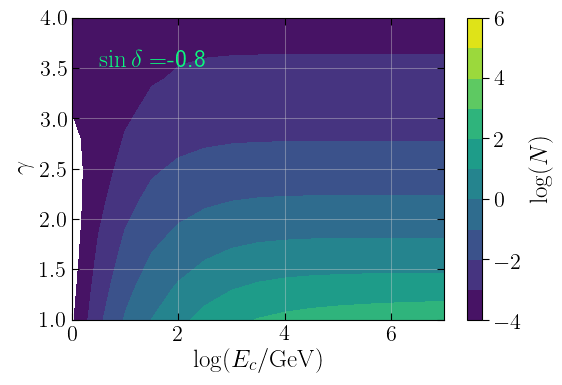

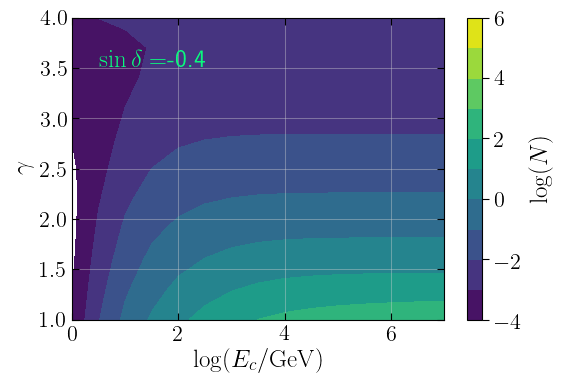

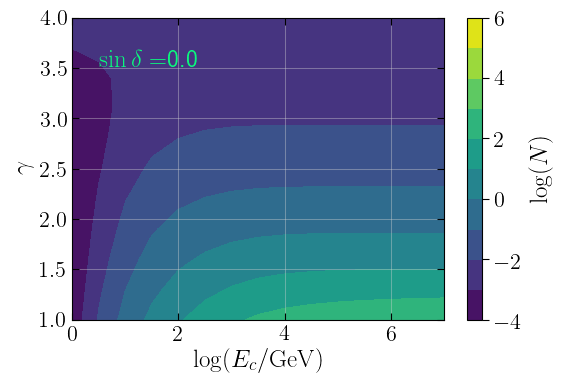

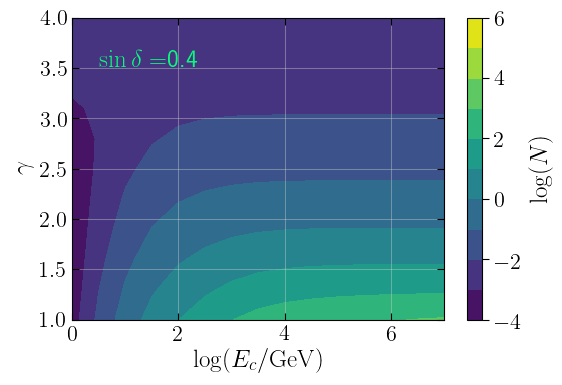

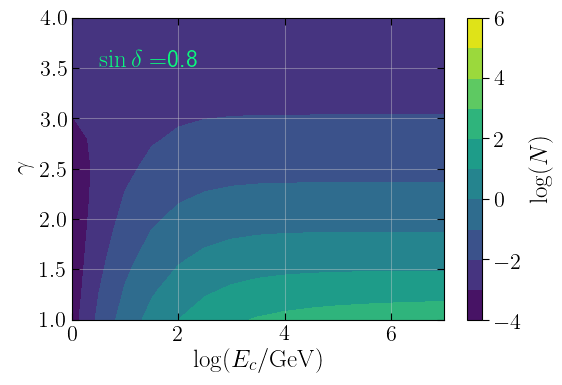

In [37]:
greco_novae = [np.asarray(gn) for gn in greco_novae]
gfu_novae = [np.asarray(gfun) for gfun in gfu_novae]

X, Y = np.meshgrid(np.log10(cutoffs), slopes)

for i in range(len(greco_novae)):
    fig, ax = plt.subplots(dpi=100)
    plt.contourf(X, Y, np.log10(greco_novae[i]), levels = np.linspace(-4., 6., 11), origin='lower', cmap = 'viridis')
    cbar = plt.colorbar()
    cbar.ax.tick_params(direction='out')
    cbar.set_label('$\log (N)$')
    plt.xlabel(r'$\log (E_c / \rm{GeV})$')
    plt.ylabel(r'$\gamma$')
    plt.text(0.5, 3.5, r'$\sin \delta = $' + '{}'.format(sinDecs[i]), color = sns.xkcd_rgb['minty green'], fontsize = 18)
    plt.show()

/home/apizzuto/.venvs/nova/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


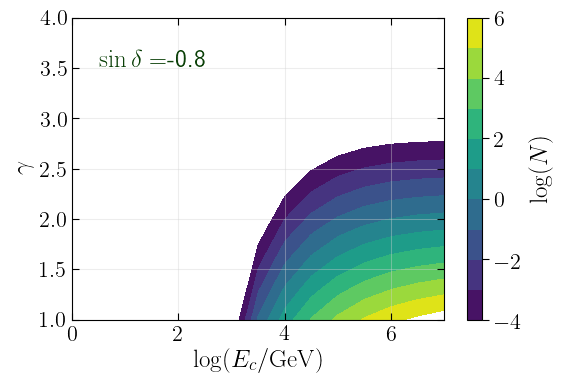

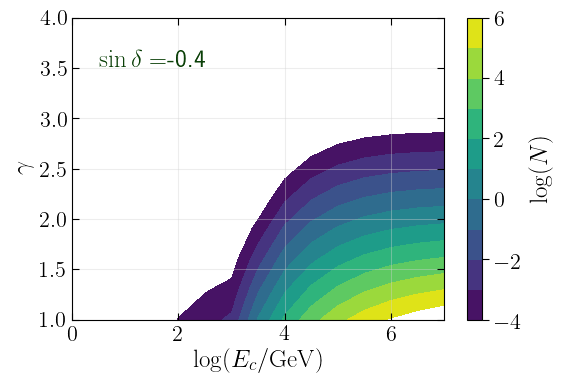

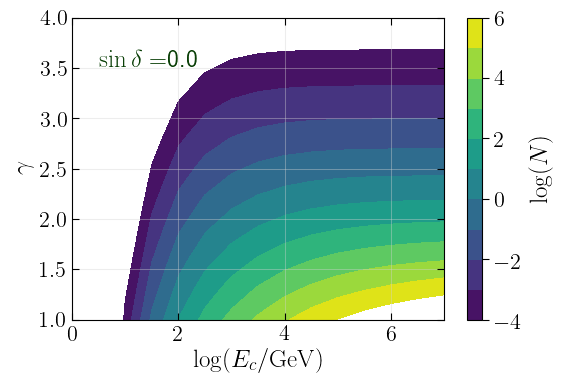

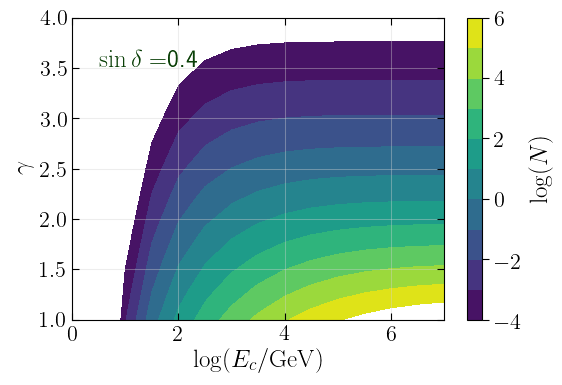

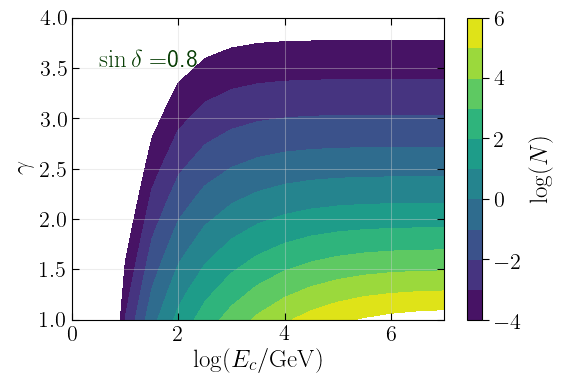

In [36]:
X, Y = np.meshgrid(np.log10(cutoffs), slopes)


for i in range(len(gfu_novae)):
    fig, ax = plt.subplots(dpi=100)
    plt.contourf(X, Y, np.log10(gfu_novae[i]), levels = np.linspace(-4., 6., 11), origin='lower', cmap='viridis')
    cbar = plt.colorbar()
    cbar.ax.tick_params(direction='out')
    cbar.set_label('$\log (N)$')
    plt.xlabel(r'$\log (E_c / \rm{GeV})$')
    plt.ylabel(r'$\gamma$')
    plt.text(0.5, 3.5, r'$\sin \delta = $' + '{}'.format(sinDecs[i]), color = sns.xkcd_rgb['hunter green'], fontsize = 18)
    plt.show()

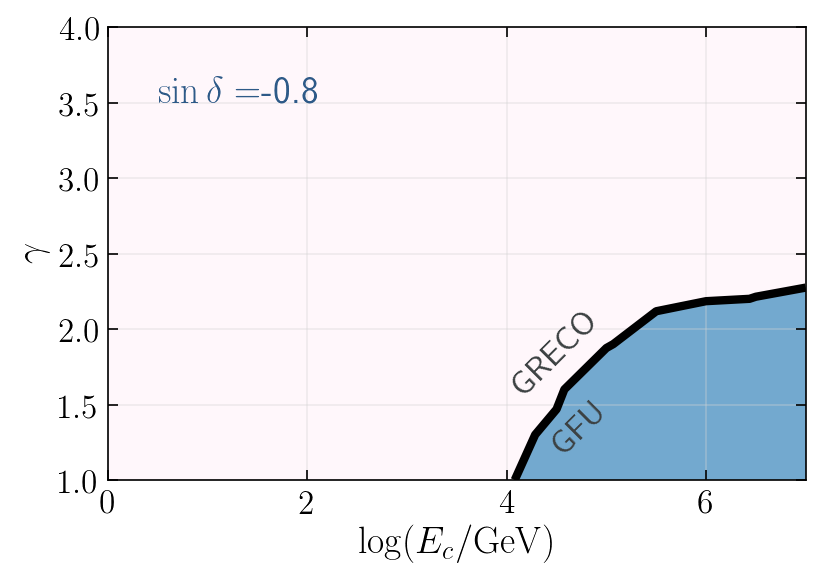

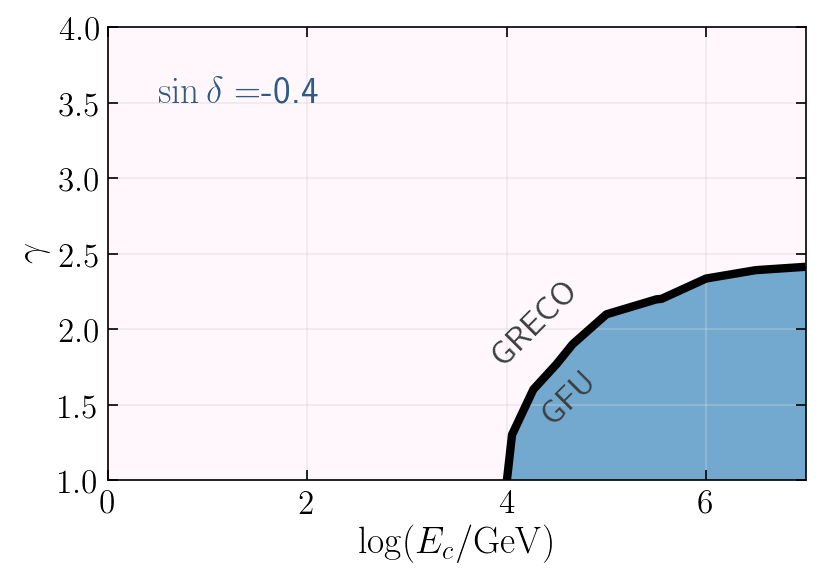

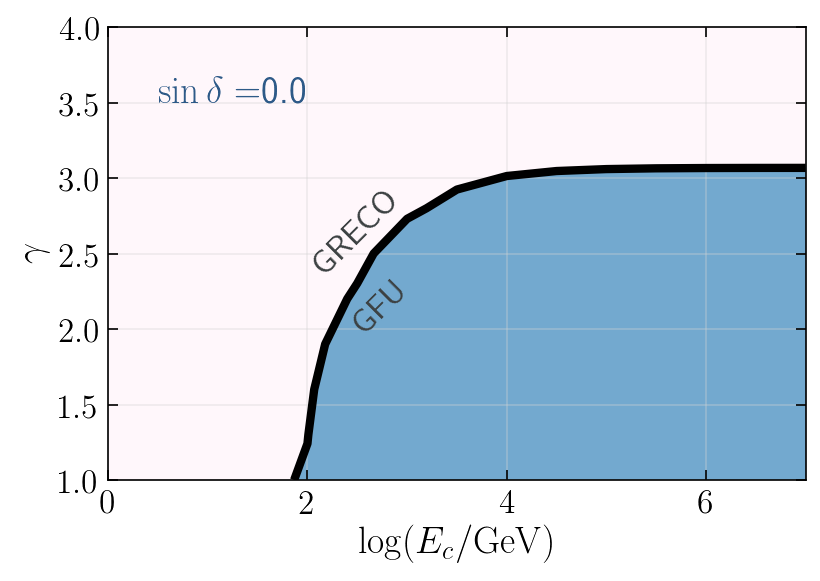

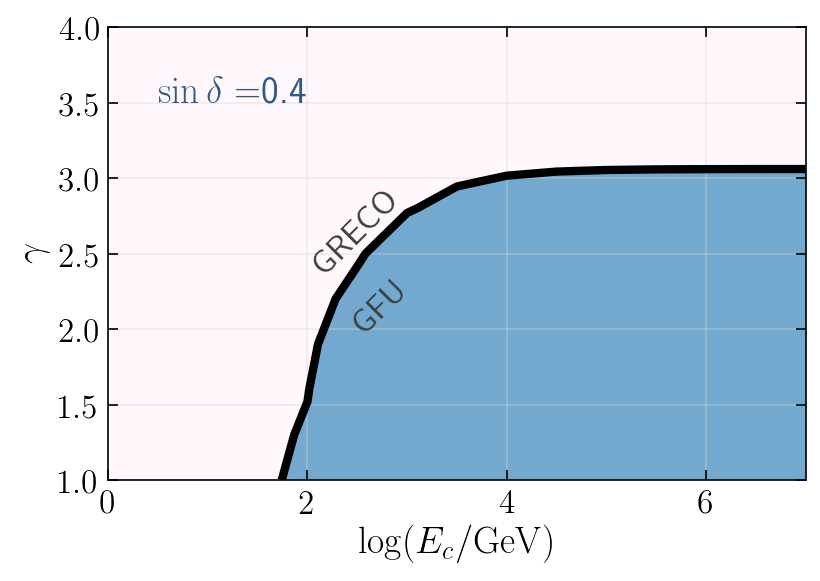

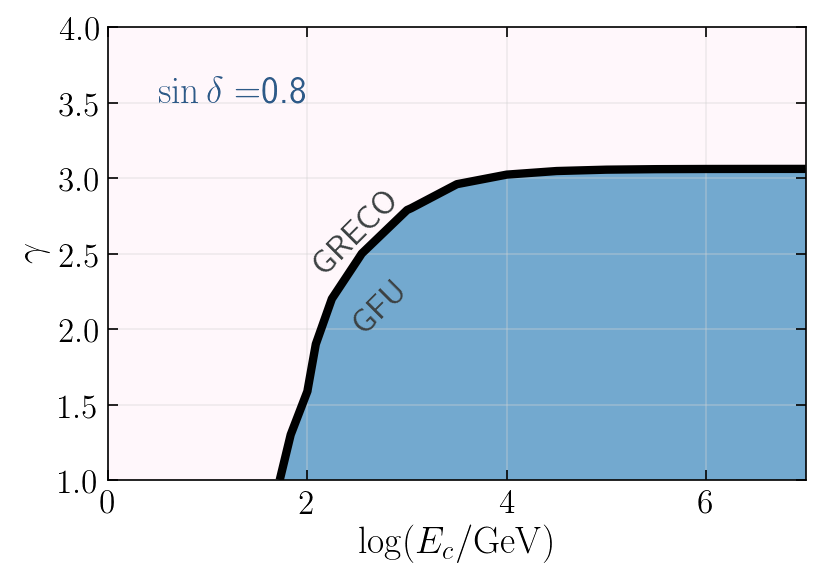

In [68]:
X, Y = np.meshgrid(np.log10(cutoffs), slopes)
gx = [4., 3.8, 2., 2., 2.]
gy = [2., 2.2, 2.8, 2.8, 2.8]

fx = [4.4, 4.3, 2.4, 2.4, 2.4]
fy = [1.4, 1.6, 2.2, 2.2, 2.2]

#np.logspace(-2., 4., 10)
for i in range(len(gfu_novae)):
    fig, ax = plt.subplots(dpi=150)
    plt.contourf(X, Y, gfu_novae[i] / greco_novae[i], levels = [0., 1.,100000.], 
                 origin='lower', linewidth=4.)
    #cbar = plt.colorbar()
    plt.contour(X, Y, gfu_novae[i] / greco_novae[i], levels = [1.], 
                 origin='lower', linewidths=4., colors = ['k'])
    cbar.ax.tick_params(direction='out')
    cbar.set_label('$\log (N)$')
    plt.xlabel(r'$\log (E_c / \rm{GeV})$')
    plt.ylabel(r'$\gamma$')
    plt.text(0.5, 3.5, r'$\sin \delta = $' + '{}'.format(sinDecs[i]), color = sns.xkcd_rgb['light navy blue'], fontsize = 18)
    plt.text(gx[i], gy[i], 'GRECO', color = sns.xkcd_rgb['charcoal grey'], rotation=45, fontsize=16)
    plt.text(fx[i], fy[i], 'GFU', color = sns.xkcd_rgb['charcoal grey'], rotation=45, fontsize=16)
    plt.show()

# NGC 1068 Test

In [10]:
test_ens = np.logspace(0., 8., 101)

slope = 3.2
sd = 0.0
fluxnorm = 0.0001990535852767489*1e5

gfuNGC = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
            flux_norm = fluxnorm, cutoff = None, dataset = gfu_mc)
grecoNGC = Nova('test', -1.*slope, 0.0, np.arcsin(sd), 56200., 20., 
            flux_norm = fluxnorm, cutoff = None, dataset = greco_mc)

0.01481373935002289
0.02674202482916162


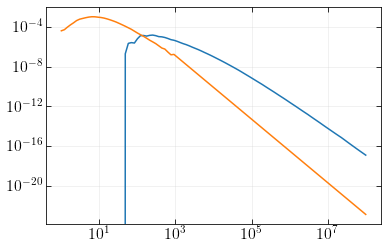

In [13]:
gfudnde = gfuNGC.calc_dNdE(test_ens)
grecodnde = grecoNGC.calc_dNdE(test_ens)

gfusig = gfuNGC.calc_expected_signal_binned(test_ens)
grecosig = grecoNGC.calc_expected_signal_binned(test_ens)

plt.plot(test_ens, gfudnde)
plt.plot(test_ens, grecodnde)

plt.loglog()

print gfusig[1]
print grecosig[1]

In [12]:
gfudnde

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.04666087e-07, 2.29497259e-06, 2.72746278e-06,
       2.48266609e-06, 6.72432916e-06, 1.37381766e-05, 1.42934088e-05,
       1.23776689e-05, 1.46800301e-05, 1.56931640e-05, 1.37390514e-05,
       1.09775494e-05, 1.04320731e-05, 8.98726380e-06, 7.11926131e-06,
       5.44085391e-06, 4.70117169e-06, 3.72998271e-06, 2.81729627e-06,
       2.15392253e-06, 1.71538400e-06, 1.29864449e-06, 9.51809218e-07,
       7.14575484e-07, 5.36382440e-07, 3.90884785e-07, 2.79070032e-07,
       2.02364333e-07, 1.44844431e-07, 1.02077660e-07, 7.11759553e-08,
       4.98102973e-08, 3.45170411e-08, 2.37389836e-08, 1.62113409e-08,
      